# QUESTION 1

In [298]:
#Import library
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [299]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Identify the columns

In [300]:
data.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

First we need to know the main descriptive statistical values of the data set

In [301]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Knowing that these values are for sneakers, the min, amd 25%->75% IQR values seem normal. But the mean, standard deviation, and max are way too high.

Before inspecting the data, it might prove useuful to visualize it and find out if the abnormal values are visible. Doing so, we may get a better clue as to how the AOV is being impacted, and guide the analysis methodology.

Text(0, 0.5, 'Order Amount ($)')

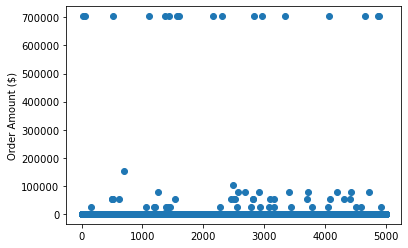

In [302]:
data_plot = data.groupby('order_id')['order_amount'].agg(['sum']).reset_index()
plt.plot(data_plot['order_id'], data_plot['sum'], 'o')
plt.ylabel('Order Amount ($)')

The majority of the transactions fit along the blue line at the bottom of the plot, and they correspond to shoe values of anywhere from 90 dollars to possibly thousand(s) dollars, though nowhere near the extreme value of 700000 dollars which are scattered near the top. The gap between the the solid line and the outliers is huge, which does help explain why AOV could be so high.

In [303]:
# Number of occurences for total item counts
data['total_items'].value_counts().sort_index()

1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: total_items, dtype: int64

We take the maximum value of the order_amount column, and using that we can see if there are any patterns/repetitions within the columns for the maximum value. This can also help us identify what to look out for when dealing with the other lower valued outliers.

In [304]:
max_order_amount=data['order_amount'].max()
skewedData = data.loc[data['order_amount'] == max_order_amount]
print(skewedData)

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    c

Notice how all of the transactions for the maximum order amount (704000), have their total items always equal to 2000, and the shop_id and user_id are consistently the same (42 and 607 respectively). Also, though the created_at dates have different date values, they all occur at the same time of 4:00:000, and many being processed twice on the same day at the same time. That is too precise of a time to be manually created, so it would make more sense that this was entirely automated, probably for buying in bulk.

Now, we need to find out how how many other outliers there are besides the transactions with order amounts of 704000 dollars.
We have seen what they visually look like in the plot above, but it would help to also know the number of occurrences for each order_amount. For our purposes, the top 20 should be sufficient.

In [310]:
occurrences = data.groupby(['order_amount']).size()
outliers = occurrences.reset_index(name='Number of Occurrences').sort_values(by='order_amount', ascending = False)

In [311]:
outlier_values.head(20)

,order_amount,Number of Occurrences
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


We can now clearly identify where the outliers are and how they are spread with their number of occurrences in the data set. 704000, 77175, 51450, 25725 are the values that both have the highest amount and the most occurrences, and this paints a better picture of what caused the AOV skew so much.

Now that we know exactly which order amounts are causing the isssues, we can take those 4 values to find additional patterns based on their shop_id, user_id, total_items, etc.

In [314]:
high_orders = data.loc[data['order_amount'].isin([704000, 77175, 51450, 25725])]
high_orders.sort_values(by='order_amount', ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
...,...,...,...,...,...,...,...
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57


##### Question 1) a) 
To summarize, the initial inspection raised some red flags, namely due to the mean of ~3145.128, the standard deviation of ~41282.539, as well as the max order of 704000. They were all way to high given the context of the data (i.e. shoes).

The "AOV" (Averge Order Value) appears to simply be the mean amount (~3145), which indicates a lack of consideration for the quantity of purches per transactions. The standard deviation and max order values being wildly abnormal are clearly observed when a scatter plot is drawn. 

The cause for this level of disparity can be explained: first, there are high transaction occurrences for the order amounts of 704000, 77175, 51450, 25725 (17, 9, 16, and 19 times respectively). Second, the 17 indentical transactions for 704000 amount included 2000 purchases each, which could certainly raise the AOV. This most likely is due to automated bulk ordering/buying. Finally, the other 3 out of 4 order amounts are all multiples of "25752", and all have the same shop_id of 78. This could be due to a simple mistake, or it could warrant further inspection to determine fraudulence.

##### Question 1) b)
Given so many outliers that will affect a metric such as "mean", the most suitable one would be to use "median".

In [313]:
data.loc[:, 'order_amount'].median()

284.0

##### Question 1) c) 
Thus, the median value is 284.00, which will better represent the products.

---

# QUESTION 2

##### Question 2) a)

SELECT COUNT(*) AS NUM_OF_ODERS

FROM Orders O 

JOIN Shippers S ON O.ShipperID = S.ShipperID

WHERE S.ShipperName = 'Speedy Express'

#### Result: 54 orders

##### Question 2) b)

SELECT EMP.LastName, COUNT(*) AS NUM_OF_ODERS

FROM Employees EMP 

JOIN Orders O ON EMP.EmployeeID = O.EmployeeID

GROUP BY EMP.LastName

ORDER BY NUM_OF_ODERS DESC

LIMIT 1;

#### Result: Last Name: Peacock, 40 orders

##### Question 2) c)

SELECT P.ProductID, P.productName, SUM(OD.Quantity) AS TOTAL_QUANTITY

FROM OrderDetails OD 

JOIN Orders O ON OD.OrderID = O.orderID

JOIN Products P ON P.productID = OD.productID

JOIN Customers c ON O.CustomerID = C.CustomerID

WHERE c.Country = 'Germany'

GROUP BY P.productID

ORDER BY TOTAL_QUANTITY DESC

LIMIT 1;

#### Result: ProductID:40, Product Name: Boston Crab Meat, 160 total ordered